In [50]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss
%matplotlib inline

In [28]:
def sigmoid(y_pred):
    return 1 / (1 + np.exp(-y_pred))


def val_curve(train_loss, test_loss):
    plt.figure()
    plt.plot(test_loss, 'r', linewidth=2)
    plt.plot(train_loss, 'g', linewidth=2)
    plt.legend(['test', 'train'])
    plt.show()

In [2]:
data = pd.read_csv('data/data.csv')

In [5]:
X, y = data.drop(['Activity'], axis=1).values, data['Activity'].values

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=241, test_size=0.8)

test - 0: 0.58
train - 183: 0.0
lr = 1


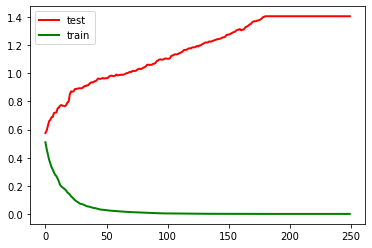

test - 3: 0.56
train - 249: 0.0
lr = 0.5


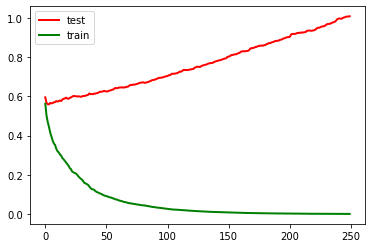

test - 10: 0.54
train - 249: 0.01
lr = 0.3


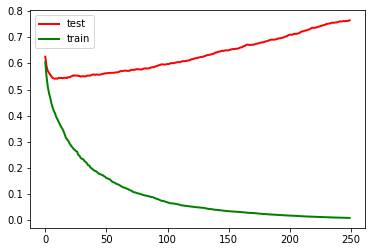

test - 18: 0.53
train - 249: 0.02
lr = 0.2


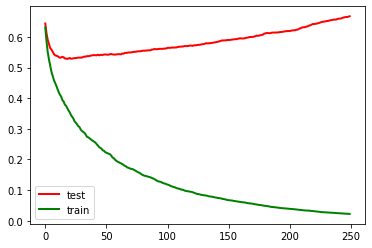

test - 51: 0.53
train - 249: 0.09
lr = 0.1


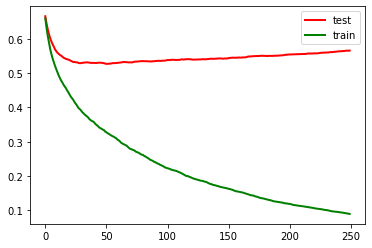

In [60]:
for lr in [1, 0.5, 0.3, 0.2, 0.1]:
    gb = GradientBoostingClassifier(n_estimators=250, learning_rate=lr)
    gb.fit(X_train, y_train)
    train = []
    for i in gb.staged_decision_function(X_train):
        train.append(log_loss(y_train, sigmoid(i)))
    test = []
    for i in gb.staged_decision_function(X_test):
        test.append(log_loss(y_test, sigmoid(i)))
    print('test - {}: {}\ntrain - {}: {}\nlr = {}'.format(test.index(min(test)), round(min(test), 2), train.index(min(train)), round(min(train), 2), lr))
    val_curve(train, test)

In [65]:
rf = RandomForestClassifier(n_estimators=19, random_state=241)

In [66]:
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=19,
                       n_jobs=None, oob_score=False, random_state=241,
                       verbose=0, warm_start=False)

In [72]:
log_loss(y_test, rf.predict_proba(X_test)[:, 1])

0.5996283310116178

In [71]:
rf.predict_proba(X_test)[:, 1]

array([0.68421053, 0.26315789, 0.36842105, ..., 0.15789474, 0.15789474,
       0.68421053])